<a href="https://colab.research.google.com/github/itrinia/DicodingMLOps-predictive-analytics/blob/main/Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/itrinia/DicodingMLOps-predictive-analytics.git

Cloning into 'DicodingMLOps-predictive-analytics'...


##DATA LOADING

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# load the dataset
url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv'
diamonds = pd.read_csv(url)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


###menangani missing value

In [5]:
x = (diamonds.x == 0).sum()
y = (diamonds.y == 0).sum()
z = (diamonds.z == 0).sum()

print("Nilai 0 di kolom x ada: ", x)
print("Nilai 0 di kolom y ada: ", y)
print("Nilai 0 di kolom z ada: ", z)

Nilai 0 di kolom x ada:  8
Nilai 0 di kolom y ada:  7
Nilai 0 di kolom z ada:  20


In [6]:
diamonds.loc[(diamonds['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [7]:
# Drop baris dengan nilai 'x', 'y', dan 'z' = 0
diamonds = diamonds.loc[(diamonds[['x','y','z']]!=0).all(axis=1)]

# Cek ukuran data untuk memastikan baris sudah di-drop
diamonds.shape

(53920, 10)

###menangani outliers

<Axes: xlabel='carat'>

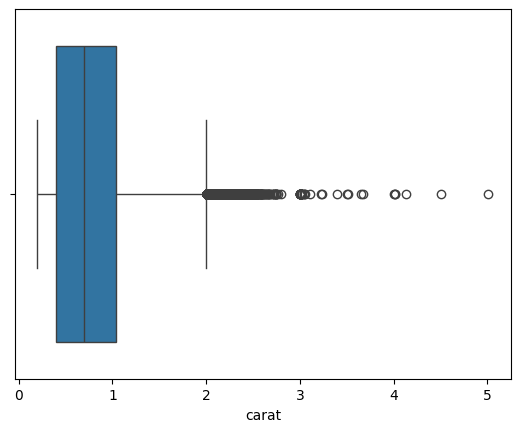

In [8]:
sns.boxplot(x=diamonds['carat'])

<Axes: xlabel='table'>

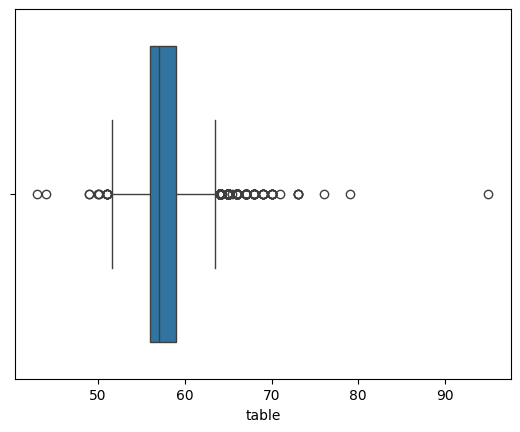

In [9]:
sns.boxplot(x=diamonds['table'])

<Axes: xlabel='x'>

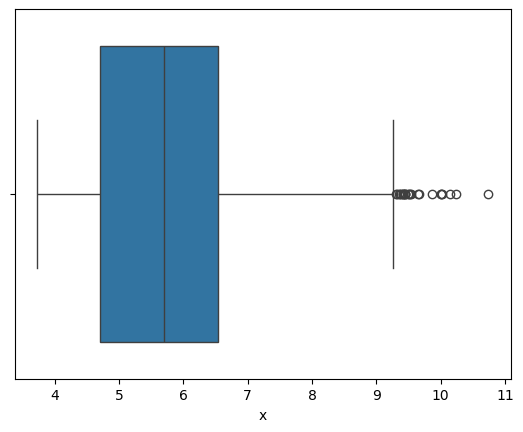

In [10]:
sns.boxplot(x=diamonds['x'])

Batas bawah = Q1 - 1.5 * IQR

Batas atas = Q3 + 1.5 * IQR
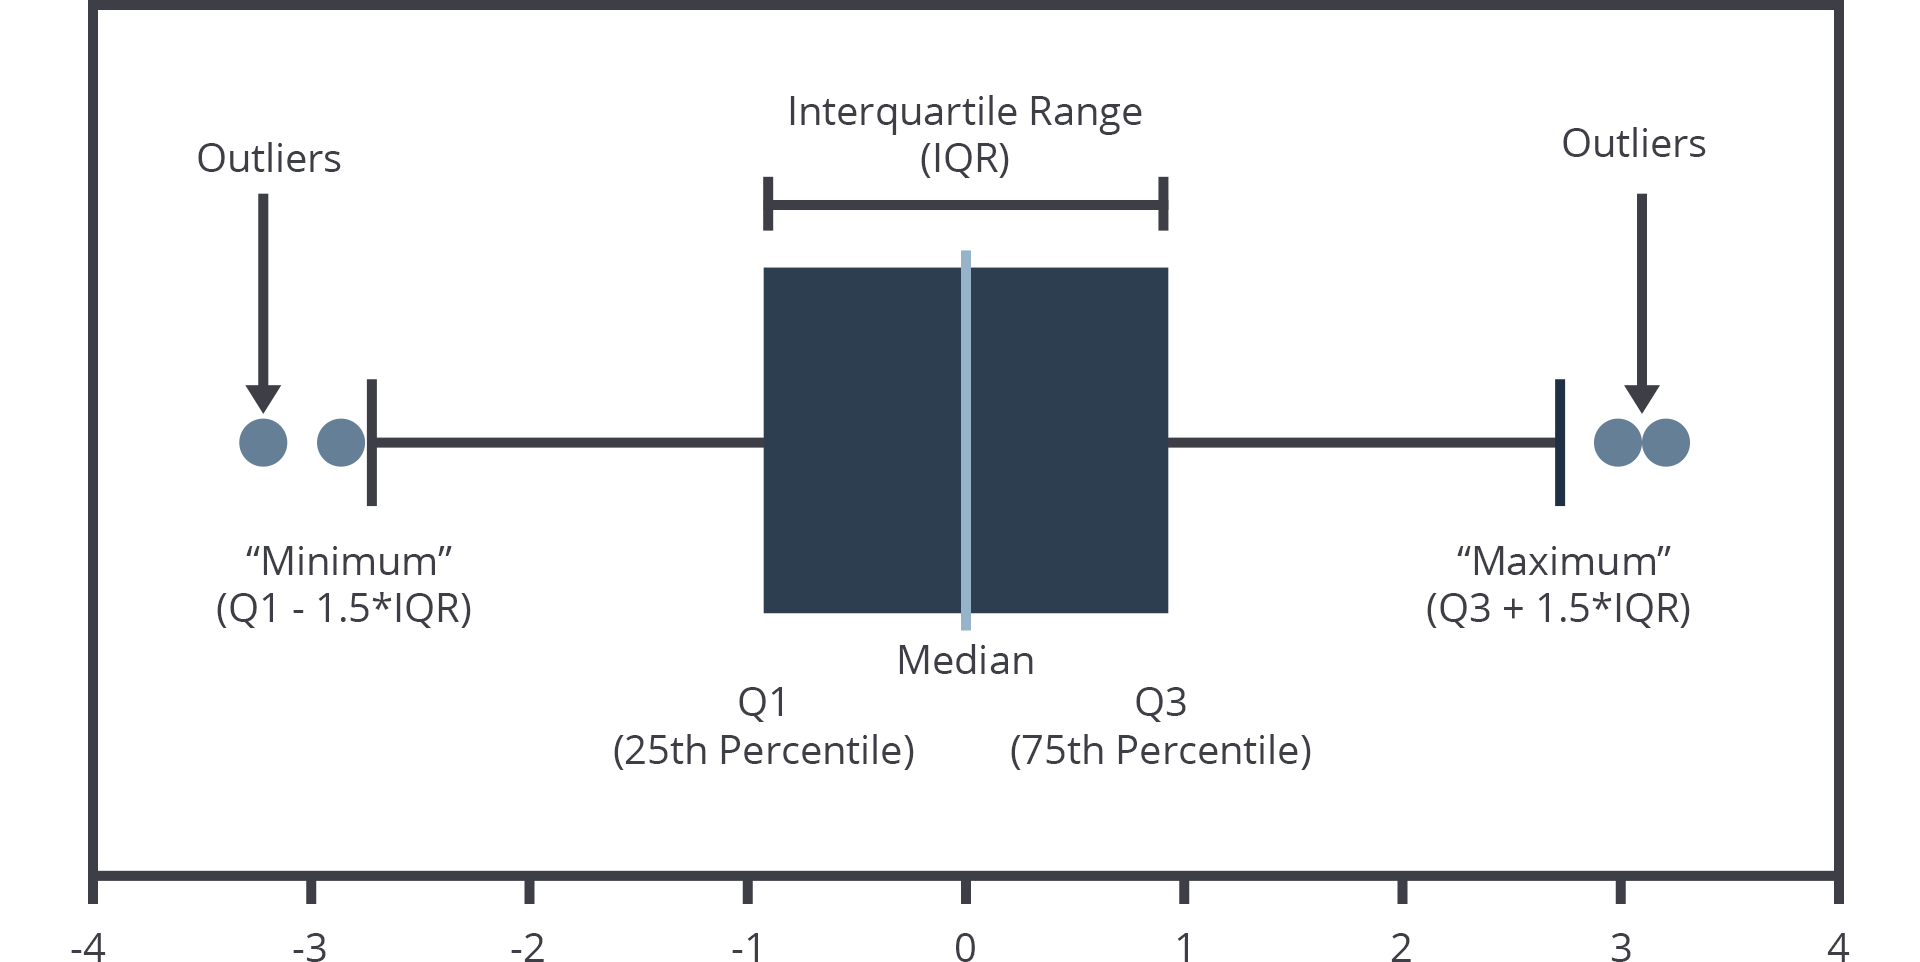

In [11]:
diamonds.dtypes

,0
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
price,int64
x,float64
y,float64
z,float64


In [12]:
# Convert only numeric columns to a suitable data type
diamonds[['carat', 'cut', 'color', 'clarity', 'depth', 'table']] = diamonds[['carat', 'cut', 'color', 'clarity', 'depth', 'table']].apply(pd.to_numeric, errors='coerce')

<ipython-input-12-17590fecc978>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds[['carat', 'cut', 'color', 'clarity', 'depth', 'table']] = diamonds[['carat', 'cut', 'color', 'clarity', 'depth', 'table']].apply(pd.to_numeric, errors='coerce')


In [13]:
Q1 = diamonds.quantile(0.25)
Q3 = diamonds.quantile(0.75)
IQR = Q3 - Q1

# Filter outliers
diamonds = diamonds[~((diamonds < (Q1 - 1.5 * IQR)) | (diamonds > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check the shape of the dataset after removing outliers
diamonds.shape

(47524, 10)

###univariate analysis

In [22]:
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

###categorical features

In [24]:
feature = categorical_features[0]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
# count.plot(kind='bar', title=feature);

Empty DataFrame
Columns: [jumlah sampel, persentase]
Index: []


In [26]:
feature = categorical_features[1]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
# count.plot(kind='bar', title=feature);

Empty DataFrame
Columns: [jumlah sampel, persentase]
Index: []


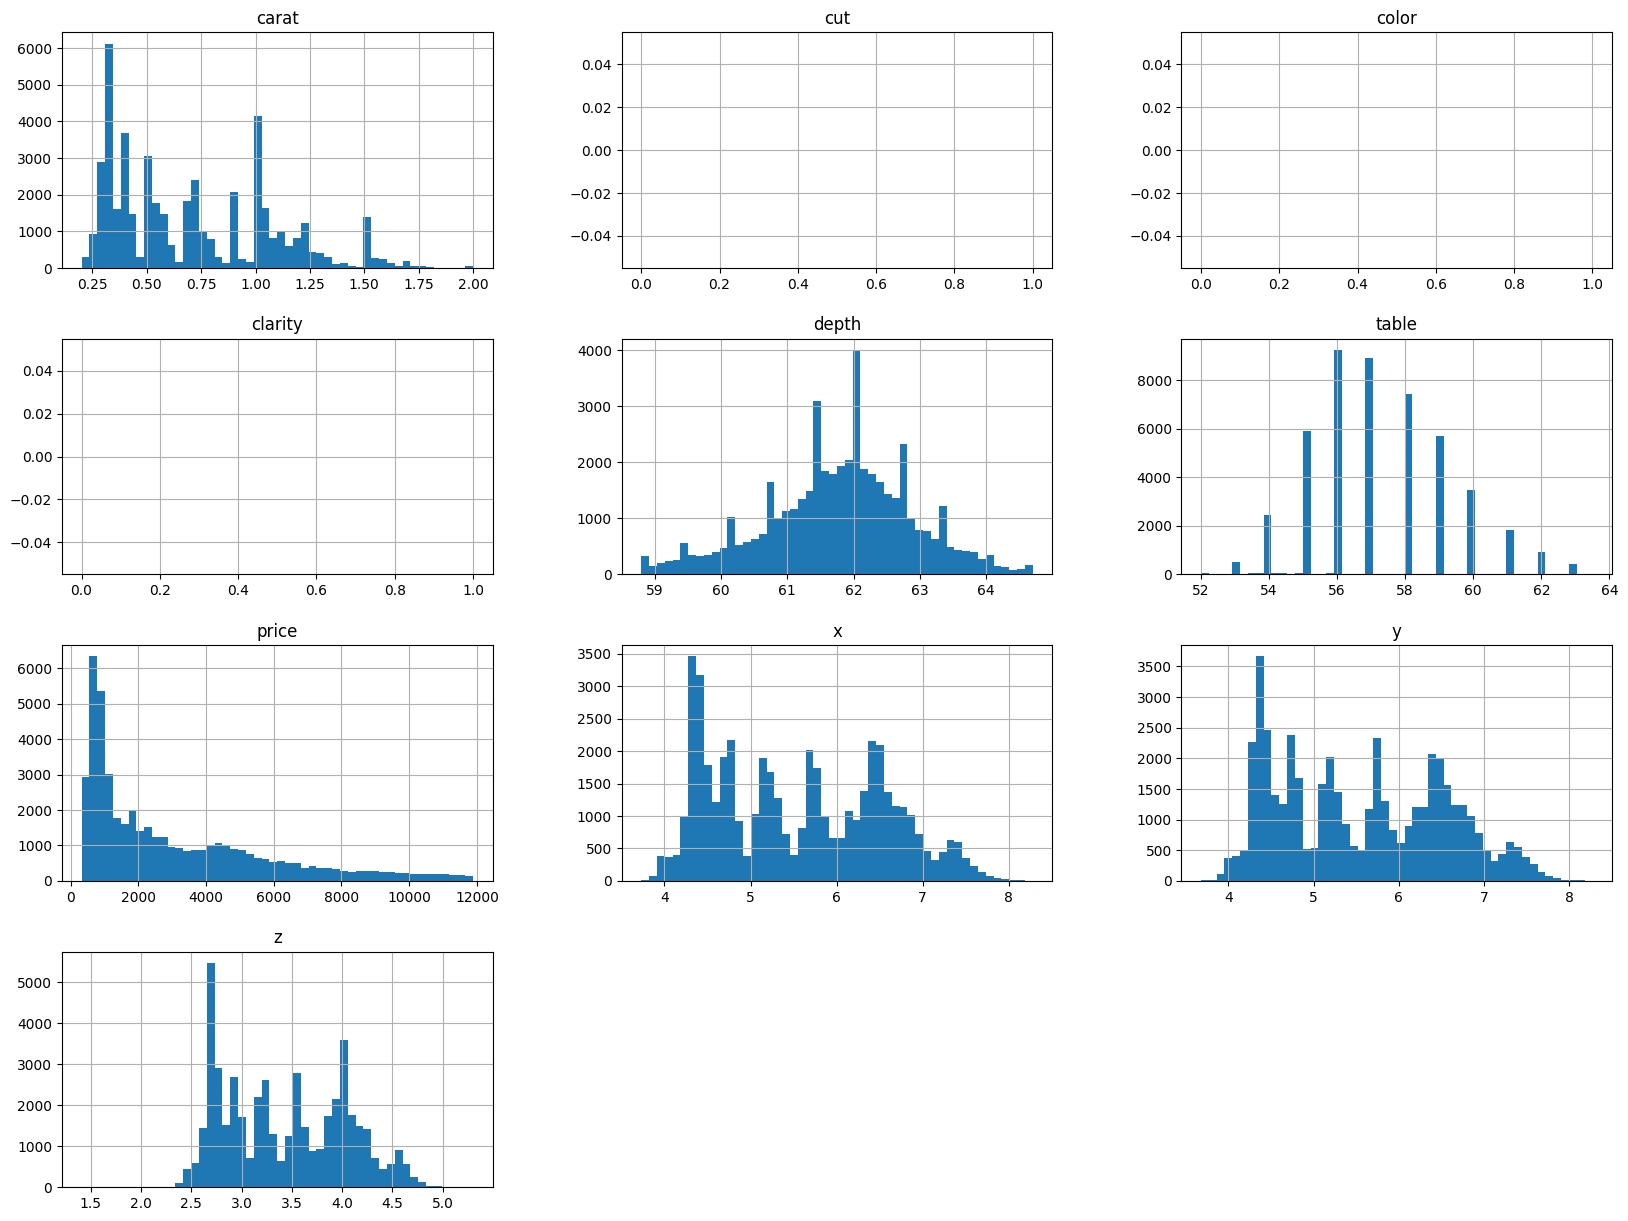

In [27]:
diamonds.hist(bins=50, figsize=(20,15))
plt.show()

###EDA: multivariate analysis
CATEGORICAL FEATURES

In [28]:
cat_features = diamonds.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=diamonds, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

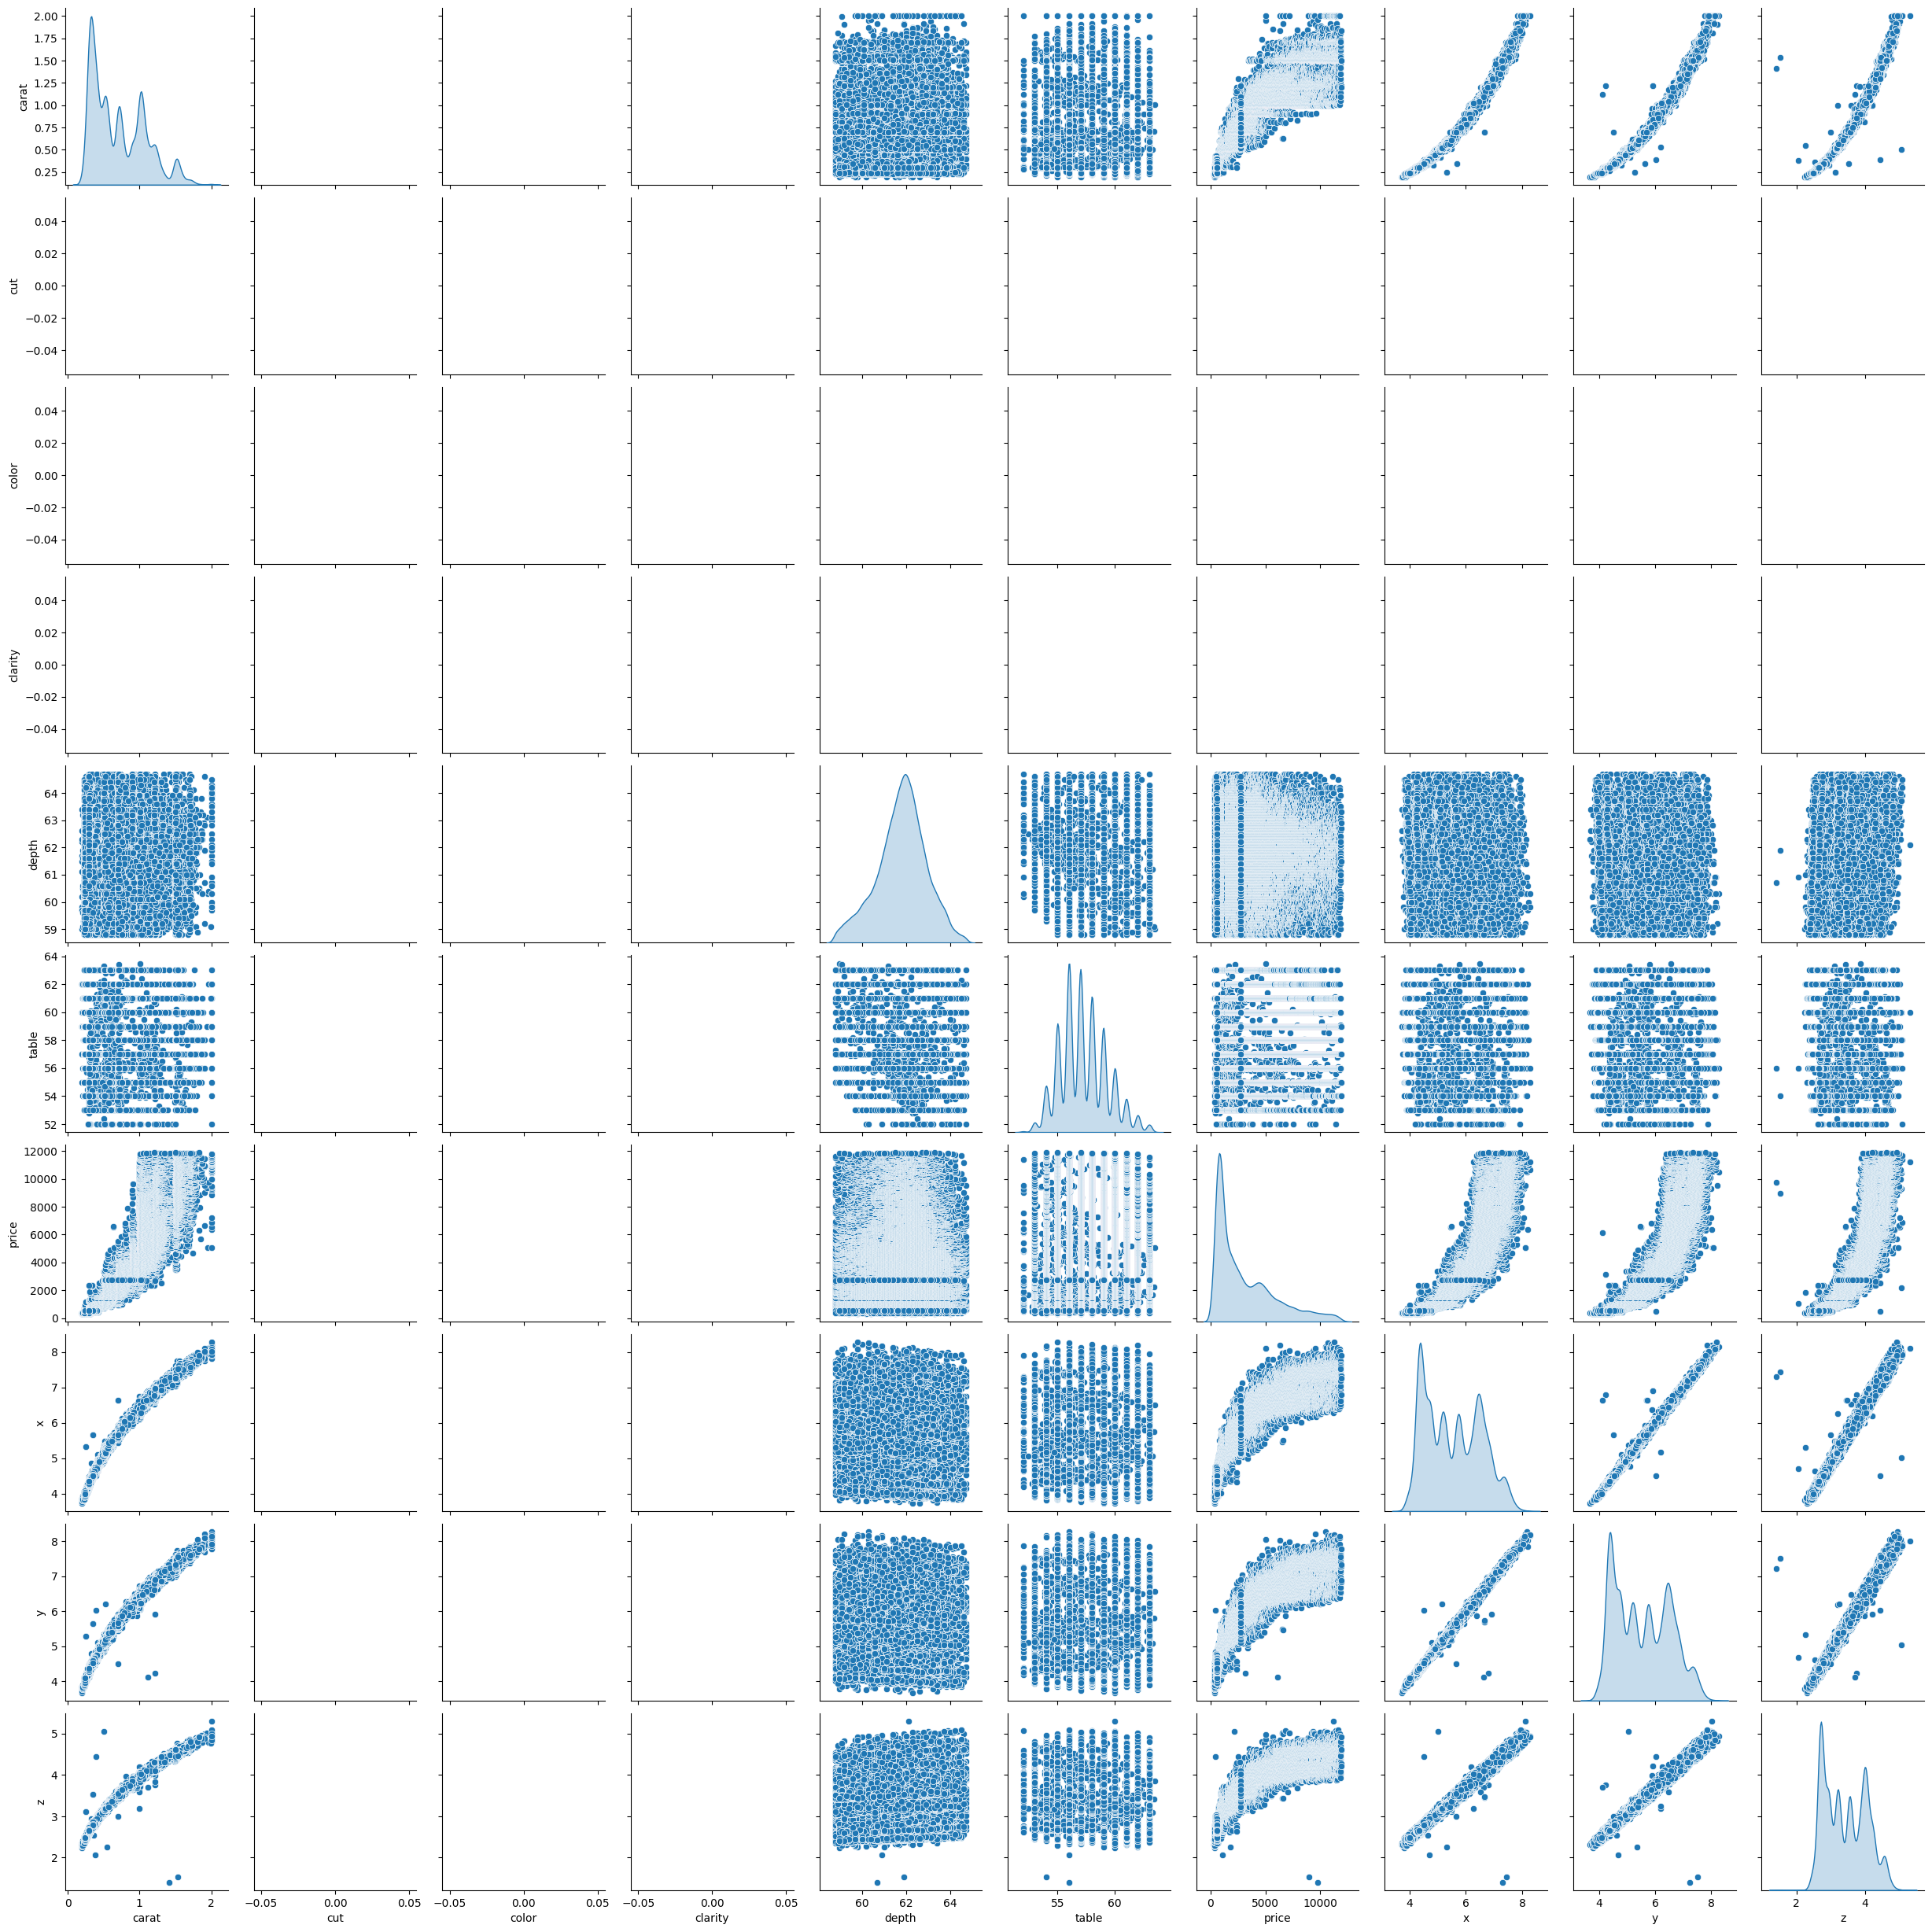

In [29]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(diamonds, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

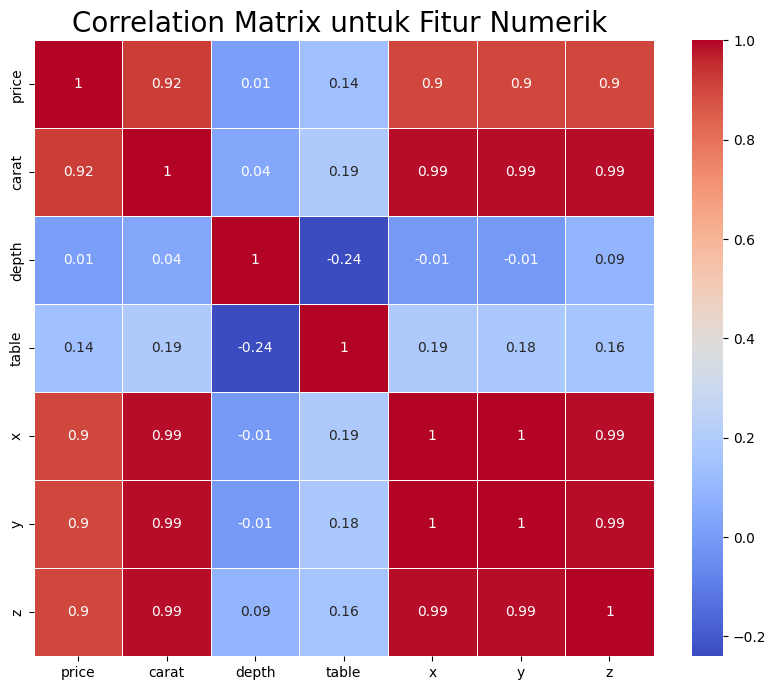

In [30]:
plt.figure(figsize=(10, 8))
correlation_matrix = diamonds[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [31]:
diamonds.drop(['depth'], inplace=True, axis=1)
diamonds.head()

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,NaN,NaN,NaN,55.0,326,3.95,3.98,2.43
1,0.21,NaN,NaN,NaN,61.0,326,3.89,3.84,2.31
3,0.29,NaN,NaN,NaN,58.0,334,4.20,4.23,2.63
4,0.31,NaN,NaN,NaN,58.0,335,4.34,4.35,2.75
5,0.24,NaN,NaN,NaN,57.0,336,3.94,3.96,2.48


##DATA PREPARATION

####Encoding Fitur Kategori

In [32]:
from sklearn.preprocessing import  OneHotEncoder
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut')],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color')],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity')],axis=1)
diamonds.drop(['cut','color','clarity'], axis=1, inplace=True)
diamonds.head()

,carat,table,price,x,y,z
0,0.23,55.0,326,3.95,3.98,2.43
1,0.21,61.0,326,3.89,3.84,2.31
3,0.29,58.0,334,4.20,4.23,2.63
4,0.31,58.0,335,4.34,4.35,2.75
5,0.24,57.0,336,3.94,3.96,2.48


#####Reduksi Dimensi dengan PCA

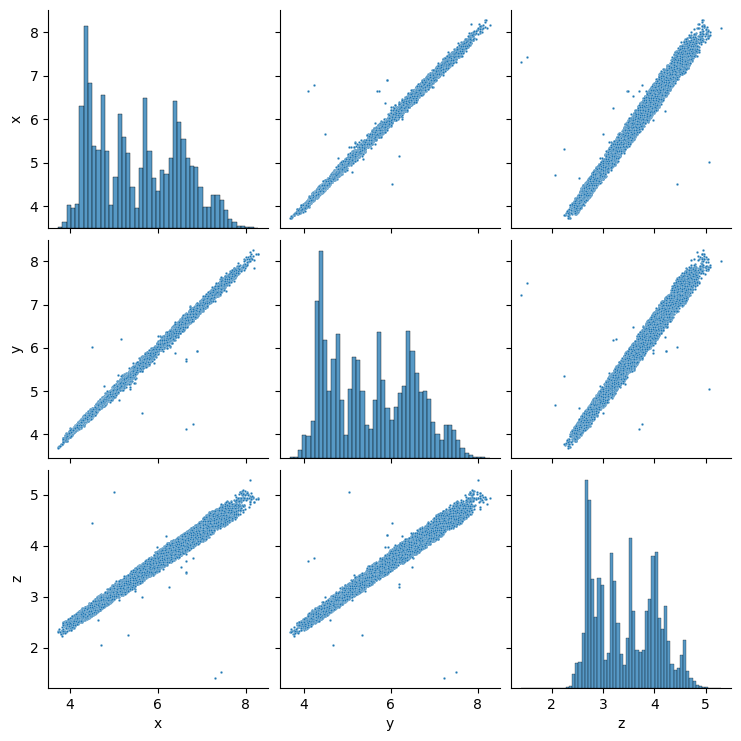

In [33]:
sns.pairplot(diamonds[['x','y','z']], plot_kws={"s": 3});

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=123)
pca.fit(diamonds[['x','y','z']])
princ_comp = pca.transform(diamonds[['x','y','z']])

In [35]:
pca.explained_variance_ratio_.round(3)

array([0.998, 0.002, 0.001])

Arti dari output di atas adalah, 99.8% informasi pada ketiga fitur ‘x’, ‘y’, ‘z’ terdapat pada PC pertama. Sedangkan sisanya, sebesar 0.2% dan 0.1% terdapat pada PC kedua dan ketiga. Perhatikanlah, jumlahnya jadi > 100%. Hal ini disebabkan oleh proses pembulatan (round) dalam 3 desimal ya, jadi tidak perlu khawatir.

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(diamonds[['x','y','z']])
diamonds['dimension'] = pca.transform(diamonds.loc[:, ('x','y','z')]).flatten()
diamonds.drop(['x','y','z'], axis=1, inplace=True)

#####Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

X = diamonds.drop(["price"],axis =1)
y = diamonds["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [38]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 47524
Total # of sample in train dataset: 42771
Total # of sample in test dataset: 4753


####Standarisasi

In [39]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['carat', 'table', 'dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,carat,table,dimension
536,-0.026226,0.864091,0.143464
21293,1.348407,1.359644,1.353588
45577,-0.511390,-0.622566,-0.372761
37379,-0.834833,-0.622566,-0.905790
38240,-0.861787,-0.622566,-0.813165


In [40]:
X_train[numerical_features].describe().round(4)

,carat,table,dimension
count,42771.0000,42771.0000,42771.0000
mean,0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000
min,-1.3739,-2.6048,-1.8867
25%,-0.8887,-0.6226,-0.9283
50%,-0.2688,-0.1270,-0.1063
75%,0.8093,0.8641,0.8847
max,3.4777,3.0941,2.6998


##MODEL DEVELOPMENT

###KNN

In [41]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)


###Random Forest
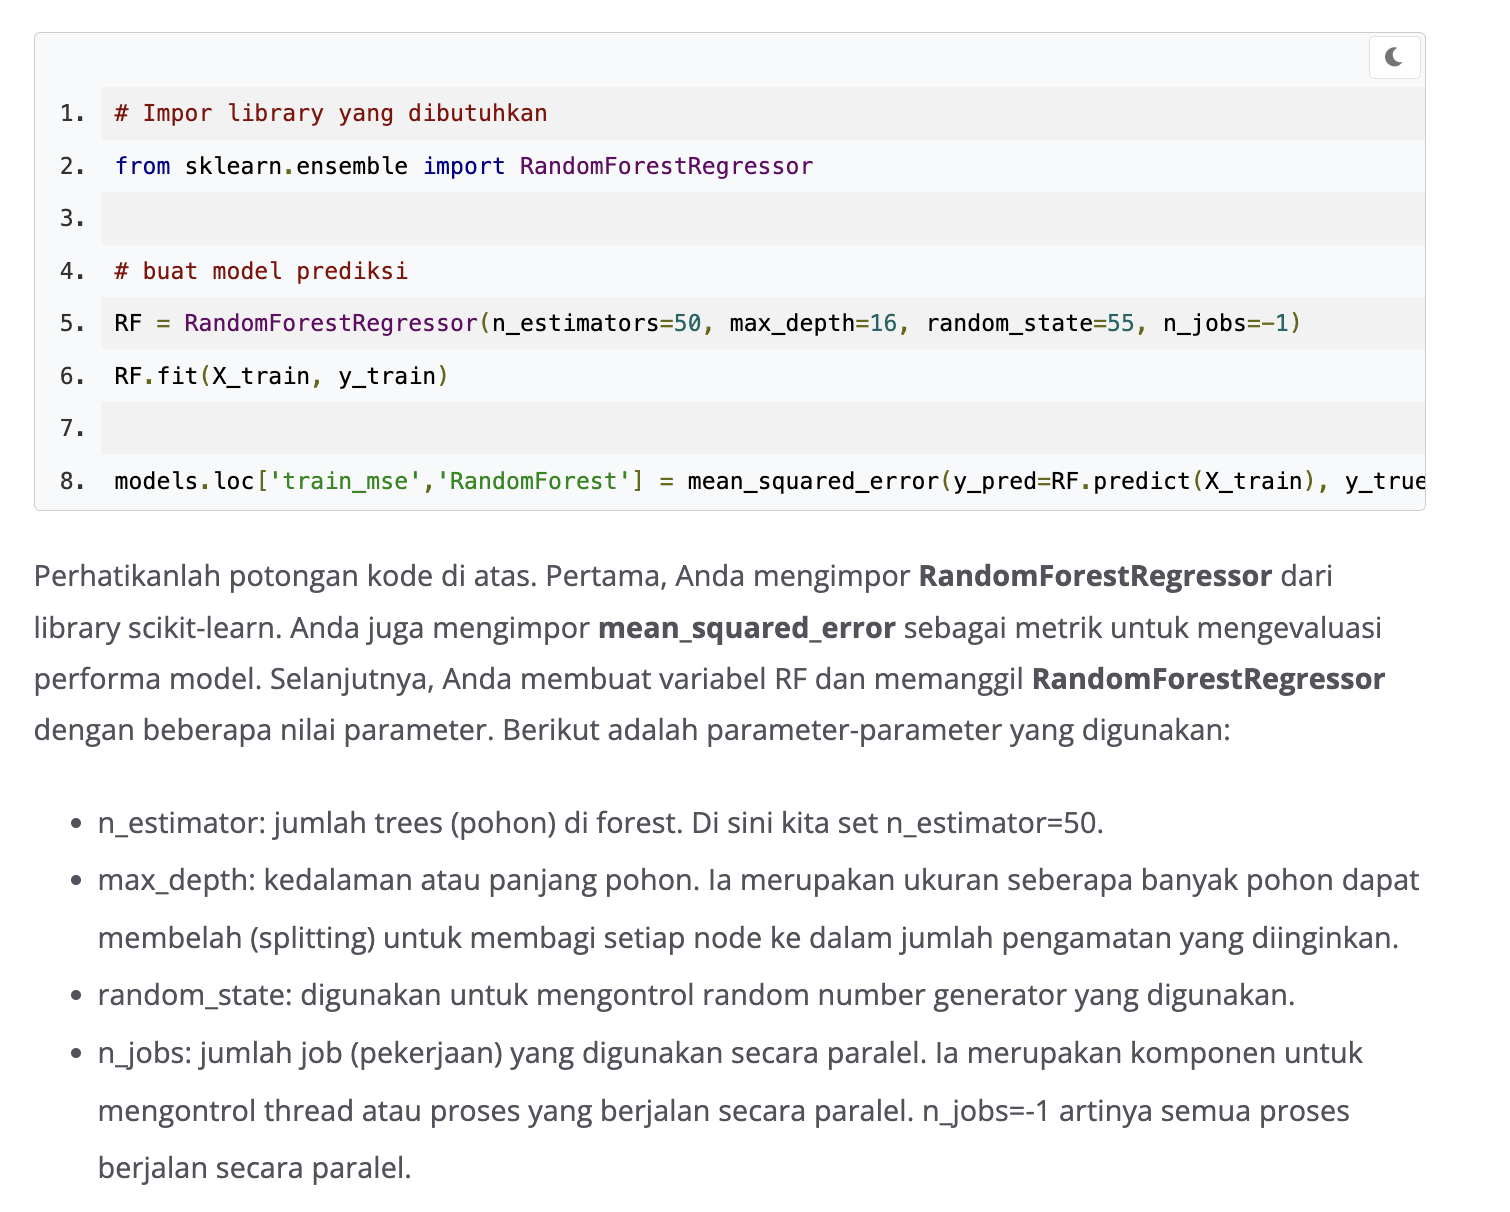

In [43]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

###Adaptive Boosting Algo

In [44]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

##EVALUASI MODEL

###Scaling

In [45]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

###MSE

In [46]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse


,train,test
KNN,830.26215,917.732211
RF,512.239035,822.645646
Boosting,1038.543342,959.440972


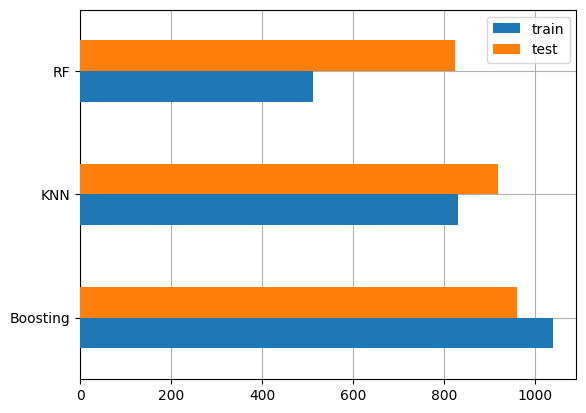

In [47]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [48]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
35096,886,586.3,633.0,788.3
